In [19]:
import copy
import comp02 as c2
import os
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as skio
import skimage.transform as sktr
import skimage.filters as skfl
import skimage.color as skcol

from importlib import reload
reload(c2)

%matplotlib inline

## Matrix Handling Operations

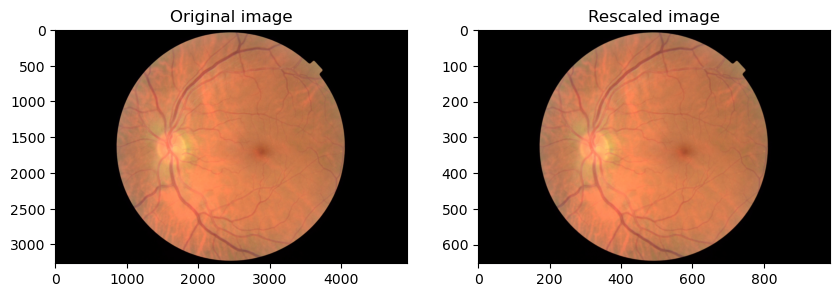

In [2]:
fig, axes = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(10)

im_retina = skio.imread("data/data/68_left.jpeg")
im_retina_rescaled = sktr.rescale(im_retina, 0.2, channel_axis=2)
axes[0].imshow(im_retina)
axes[0].set_title("Original image")
axes[1].imshow(im_retina_rescaled)
axes[1].set_title("Rescaled image");

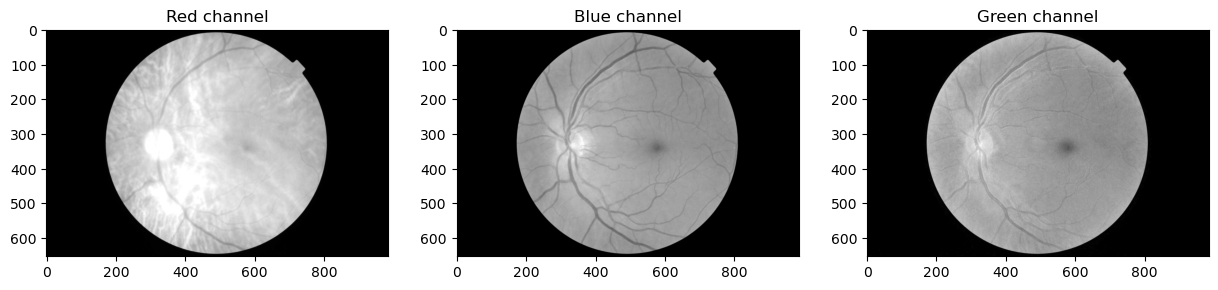

In [3]:
fig, axes = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)

im_retina_copied = copy.deepcopy(im_retina_rescaled)
im_red, im_green, im_blue = [ im_retina_copied[:, :, i] for i in range(0,3)]

axes[0].imshow(im_red, cmap="gray")
axes[0].set_title("Red channel")
axes[1].imshow(im_green, cmap="gray")
axes[1].set_title("Blue channel")
axes[2].imshow(im_blue, cmap="gray")
axes[2].set_title("Green channel");

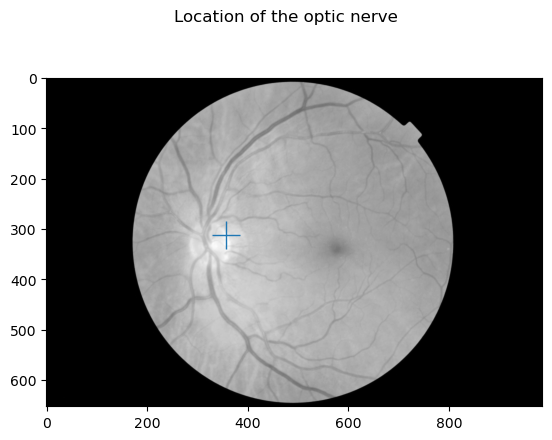

In [4]:
fig = plt.figure(1)
fig.suptitle("Location of the optic nerve")

imG = skcol.rgb2gray(im_retina_rescaled)
plt.imshow(imG, cmap="gray")
x_max, y_max = np.unravel_index(np.argmax(imG, axis=None), imG.shape)
plt.plot(y_max, x_max, "+", ms=20);

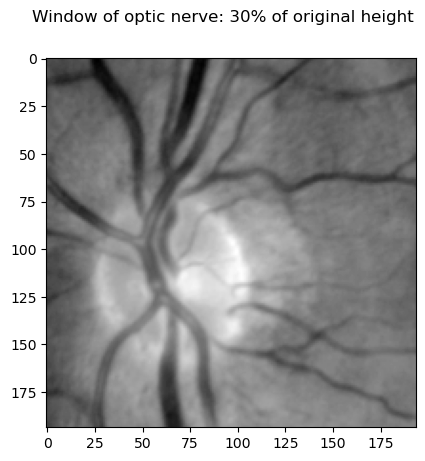

In [5]:
fig = plt.figure(1)
fig.suptitle("Window of optic nerve: 30% of original height")

height = np.shape(imG)[0]
if height % 2 == 0:
    perc_height = int(0.3/2 * height)
else:
    perc_height = int(0.3/2 * (height - 1))
imG_window = imG[x_max - perc_height: x_max + perc_height, y_max - perc_height: y_max + perc_height]

plt.imshow(imG_window, cmap="gray");

## Histogram

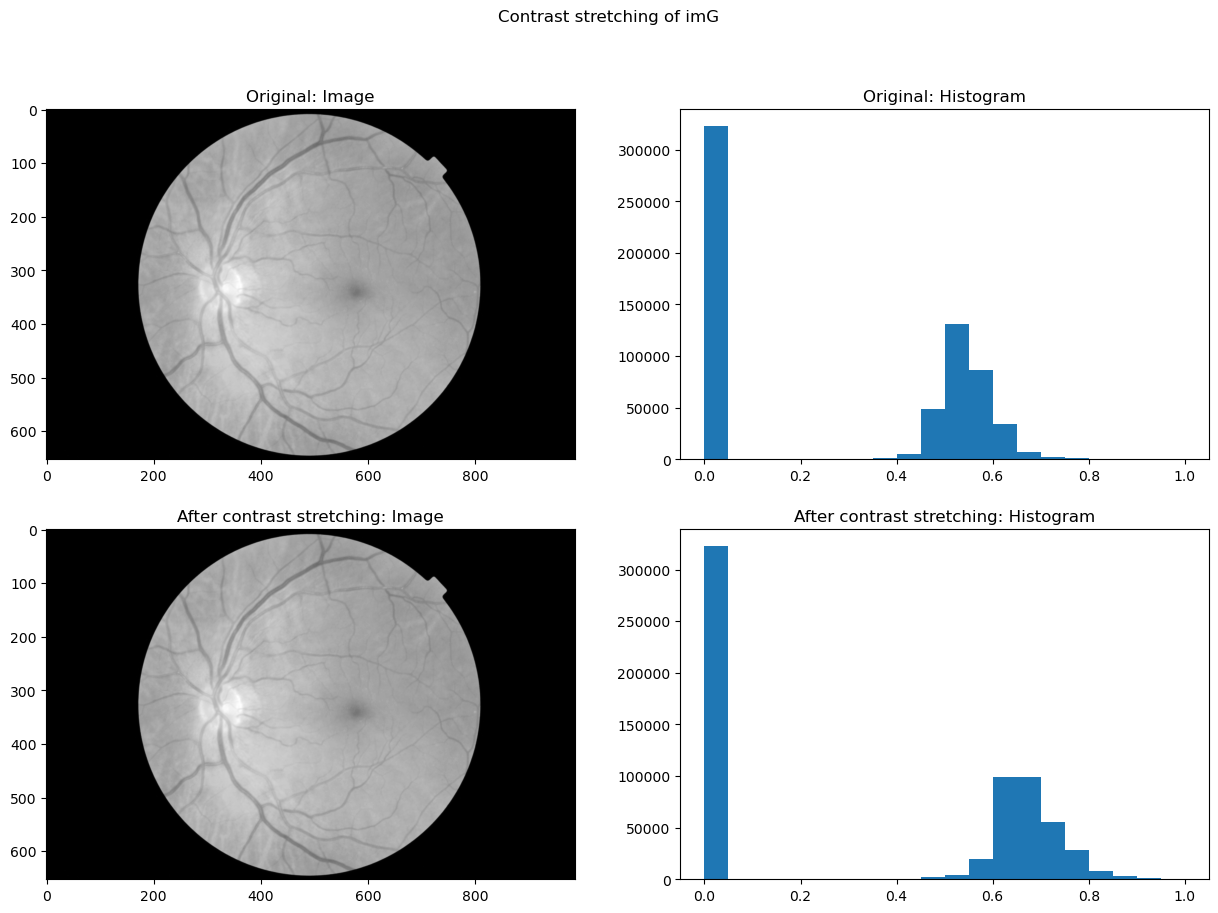

In [6]:
fig, axes = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)

fig.suptitle("Contrast stretching of imG")

hist = c2.Histogram()

list_img = [imG, hist.contrast_stretch(imG)]
list_title = ["Original", "After contrast stretching"]

for i in [0, 1]:
    axes[i, 0].imshow(list_img[i], cmap="gray")
    axes[i, 0].set_title(list_title[i] + ": Image")
    axes[i, 1].hist(list_img[i].flatten(), bins=20, range=(0, 1))
    axes[i, 1].set_title(list_title[i] + ": Histogram")

Otsu threshold: 0.2727658167289505


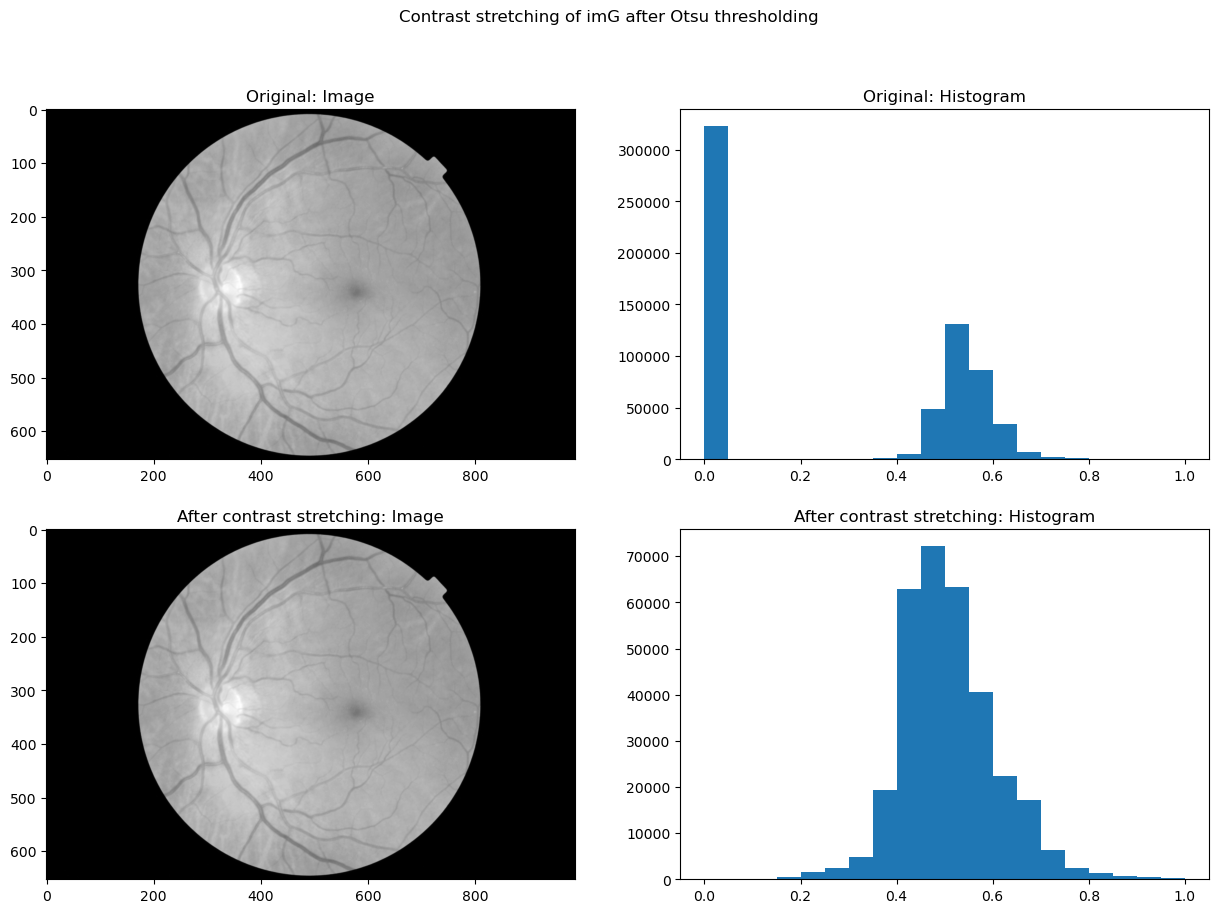

In [7]:
threshold_otsu = skfl.threshold_otsu(imG)
print(f"Otsu threshold: {threshold_otsu}")

fig, axes = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)

fig.suptitle("Contrast stretching of imG after Otsu thresholding")

hist = c2.Histogram()

list_img = [imG, hist.contrast_stretch(imG, lowest_pixel=threshold_otsu)]
list_title = ["Original", "After contrast stretching"]

for i in [0, 1]:
    axes[i, 0].imshow(list_img[i], cmap="gray")
    axes[i, 0].set_title(list_title[i] + ": Image")
    axes[i, 1].hist(list_img[i].flatten(), bins=20, range=(0, 1))
    axes[i, 1].set_title(list_title[i] + ": Histogram")

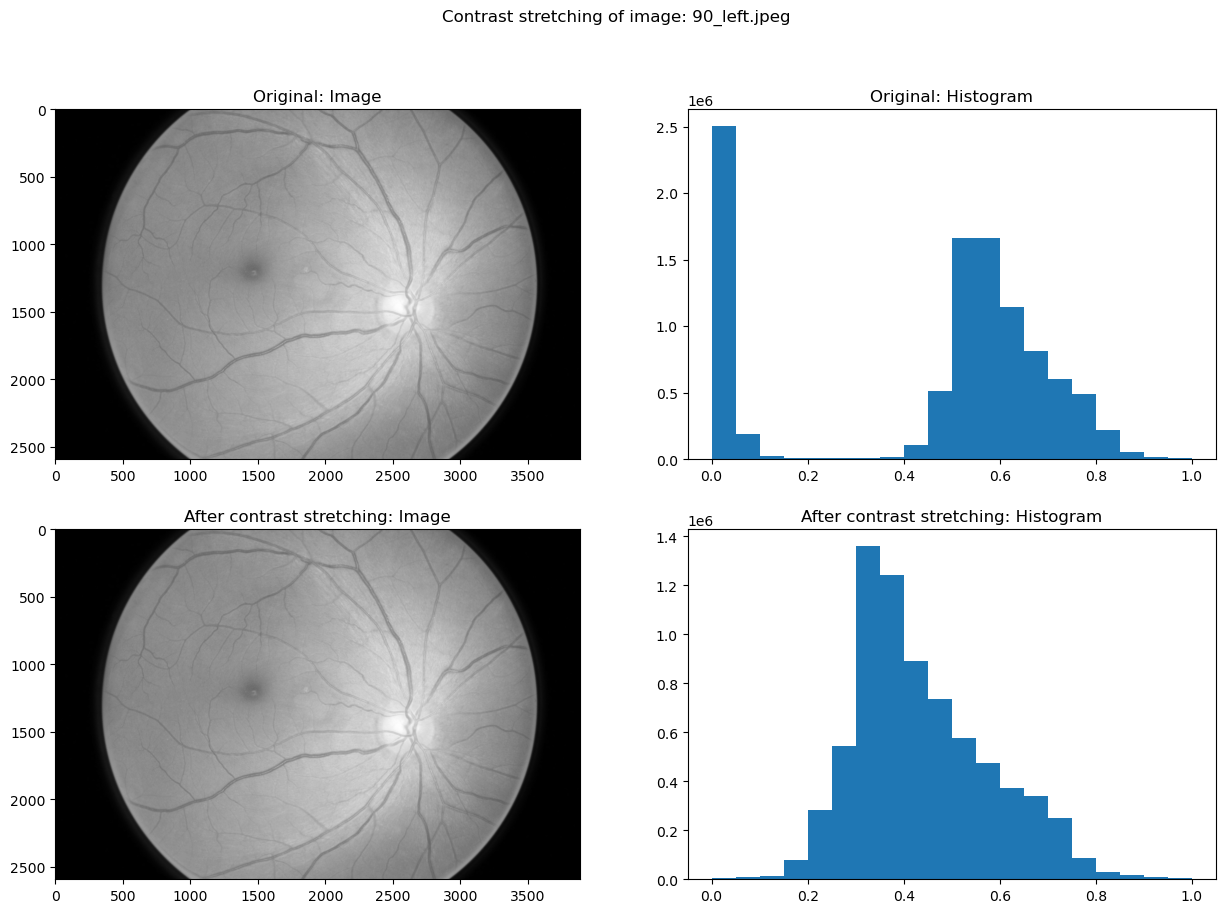

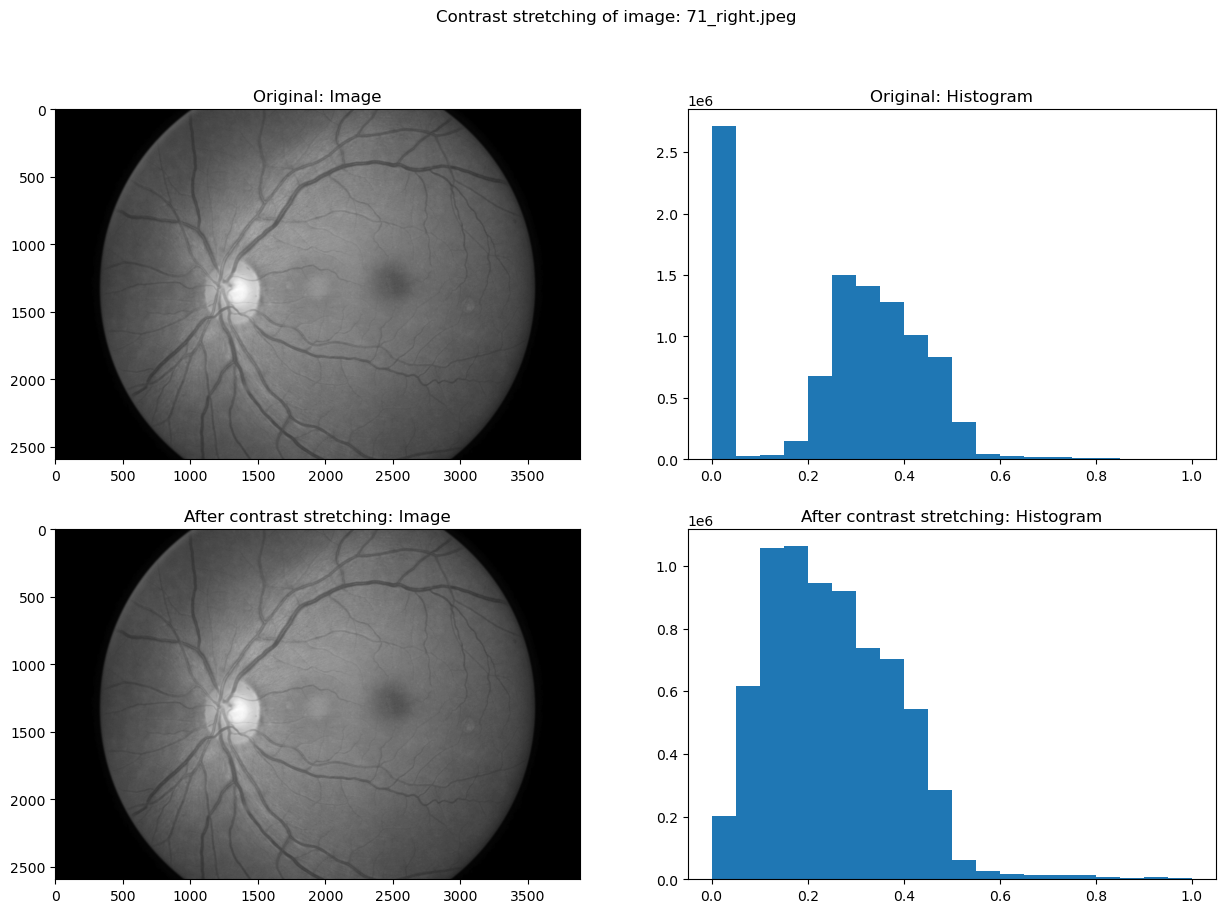

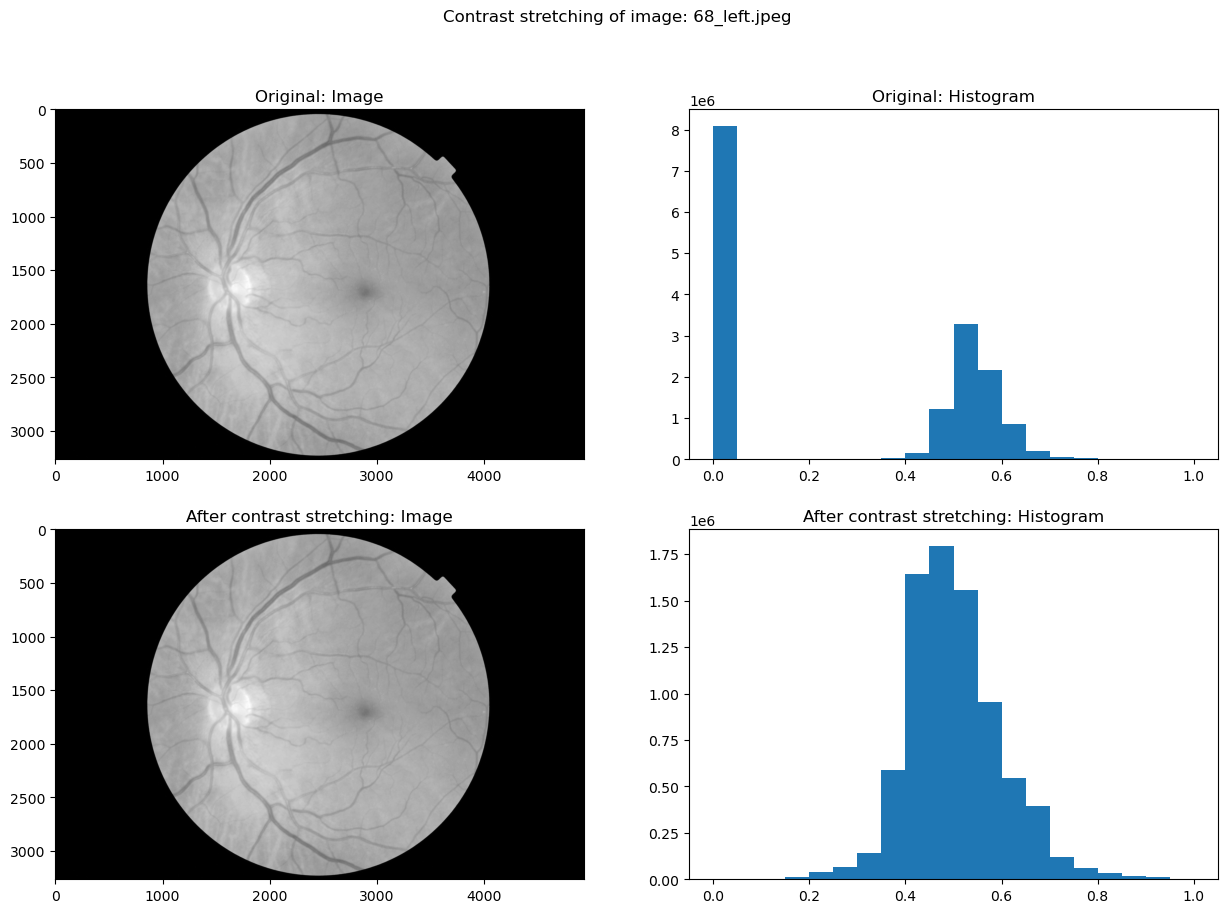

In [20]:
hist = c2.Histogram()
folderpath_img = "/home/chinmay/Documents/UTHealth/Code/bmi_6331/module_2/data/data"
for filename_img in os.listdir(folderpath_img):
    if filename_img.endswith(".jpeg"):
        hist.pipeline(os.path.join(folderpath_img, filename_img))